# Task 6.6 Sourcing & Analyzing Time Series Data

## Table of Contents

## 1. Import Libraries and Data

## 2. Data Checks and Cleaning

## 3. Time-Series Analysis: Decomposition

## 4. Testing for Stationarity

## 5. Stationarizing Time Series Data

## 1. Import Libraries and Data

In [33]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [34]:
# Configure API key 

quandl.ApiConfig.api_key = 'izfPWU4g4N6Hjyr36xY4'

In [82]:
# Importing the Federal Reserve Economic Data "Civilian Employment-Population Ratio" variable.

data = quandl.get('FRED/EMRATIO')

## 2. Data Checks and Cleaning

In [83]:
data.head(5)

,Value
Date,
1948-01-01,56.6
1948-02-01,56.7
1948-03-01,56.1
1948-04-01,56.7
1948-05-01,56.2


In [84]:
data.tail(5)

,Value
Date,
2021-09-01,58.8
2021-10-01,58.9
2021-11-01,59.3
2021-12-01,59.5
2022-01-01,59.7


In [85]:
data.shape

(889, 1)

In [86]:
data.columns

Index(['Value'], dtype='object')

In [87]:
type(data)

pandas.core.frame.DataFrame

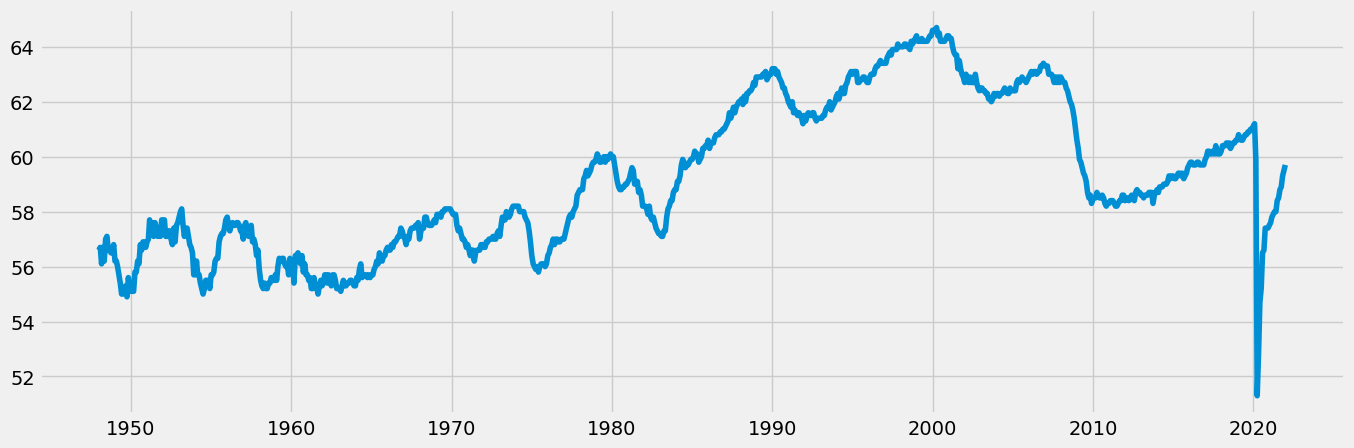

In [88]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

#### I chose not to create a subset for this data. 

In [89]:
# Check for missing values
data.isnull().sum()

Value    0
dtype: int64

In [96]:
# Check for duplicate values
dups = data.index.duplicated()
dups.sum()

0

## 3. Time-Series Analysis: Decomposition

In [97]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [98]:
# Define a fixed size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

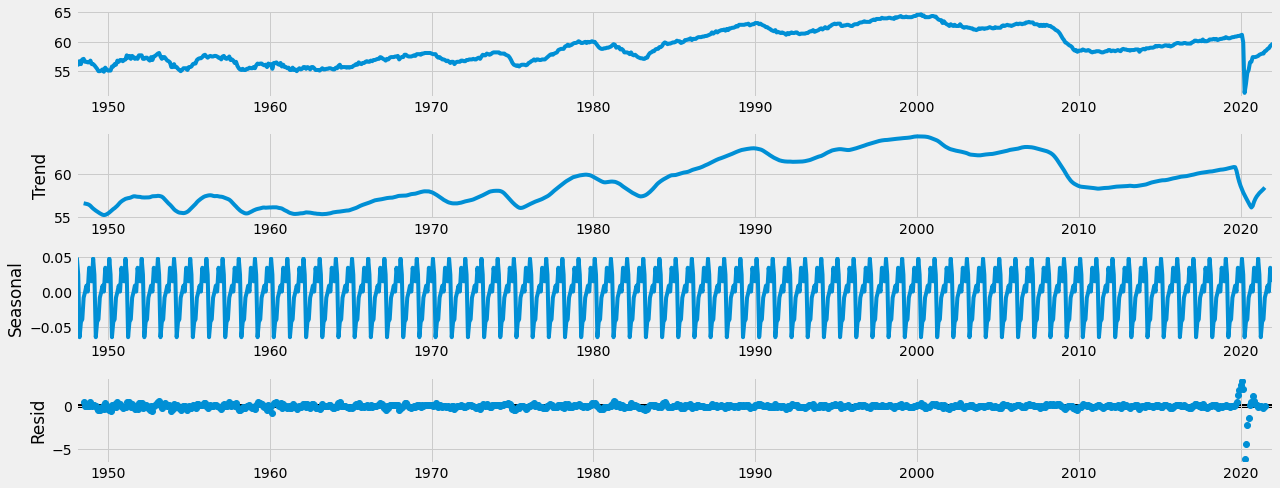

In [99]:
# Plot the separate components
decomposition.plot()
plt.show()

#### Since the level and the trend vary slightly, the data we are working with is unsmoothed. There was a steady increase in employment in the mid-1980s, with a few ups and downs, until just before 2010, when employment decreased due to a recession in the US. There is also a sharp decline in 2020, right around the time the pandemic started. The seasonality fluctuations change at a regular interval. The residual does not show much unexplained noise, but the obvious decrease in employment in 2020 is present. Overall, there is not a dominant trend, but there are seasonal fluctuations. 

## 4. Testing for Stationarity

In [101]:
# Import adfuller model, perform dickey_fuller test, and apply test using function on a time series
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.011127
p-value                          0.281716
Number of Lags Used              2.000000
Number of Observations Used    886.000000
Critical Value (1%)             -3.437752
Critical Value (5%)             -2.864808
Critical Value (10%)            -2.568510
dtype: float64


#### The test statistic is -2.0 and the p-value is 0.28. Since the p-value is greater that 0.05, this means that the test result is not significant. By using the critical value of 5%, which is -2.86, we cannot reject the null hypothesis since the test statistic is larger than the critical value. This shows that the data is non-stationary. 

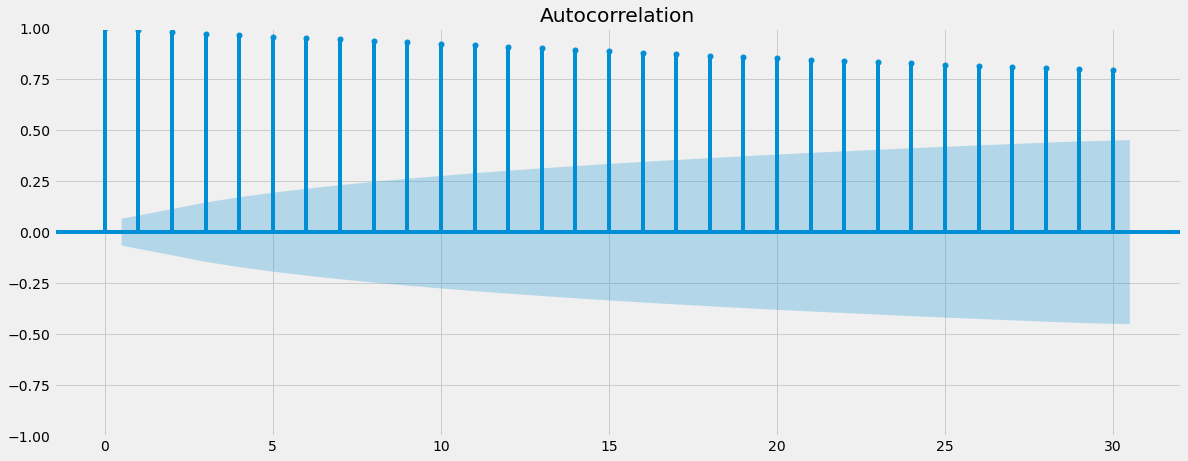

In [102]:
# Plotting autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

#### The autocorrelation show the lags beyond the confidence interval, meaning the lags are significantly correlated with each other. We can conclude that the data is non-stationary. 

## 5. Stationarizing Time Series Data

In [104]:
# Calculate difference between every values and its lag, then store results in new dataframe
data_diff = data - data.shift(1) 

In [105]:
# Drop any missing values
data_diff.dropna(inplace = True)

In [106]:
data_diff.head()

,Value
Date,
1948-02-01,0.1
1948-03-01,-0.6
1948-04-01,0.6
1948-05-01,-0.5
1948-06-01,0.8


In [107]:
data_diff.columns

Index(['Value'], dtype='object')

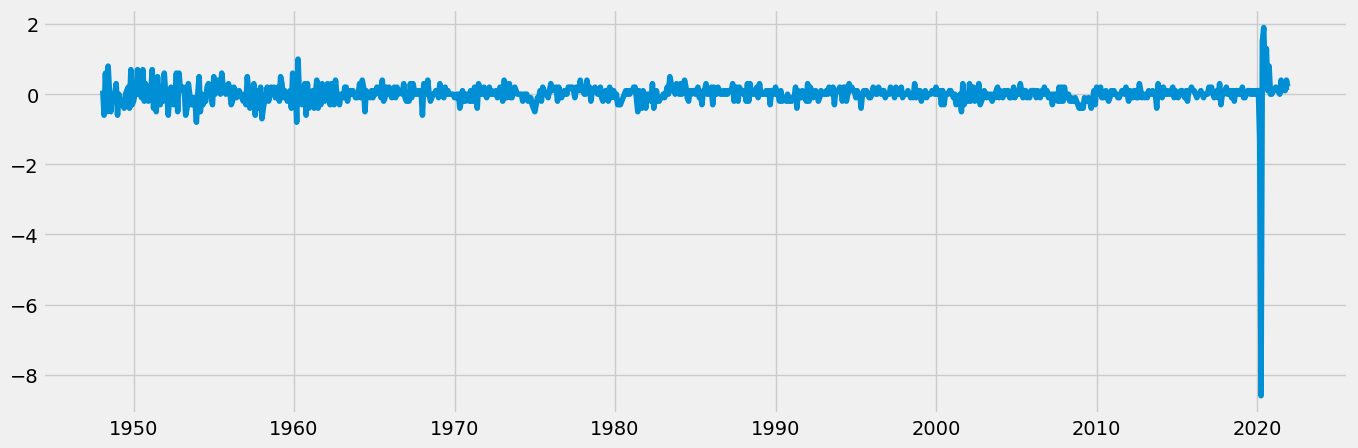

In [108]:
# Plotting time series with differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [109]:
# Perform Dickey-Fuller Test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -22.820340
p-value                          0.000000
Number of Lags Used              1.000000
Number of Observations Used    886.000000
Critical Value (1%)             -3.437752
Critical Value (5%)             -2.864808
Critical Value (10%)            -2.568510
dtype: float64


#### With this Dickey-Fuller test, the test statistic is much smaller than the critical value, concluding that the data is now stationary. 

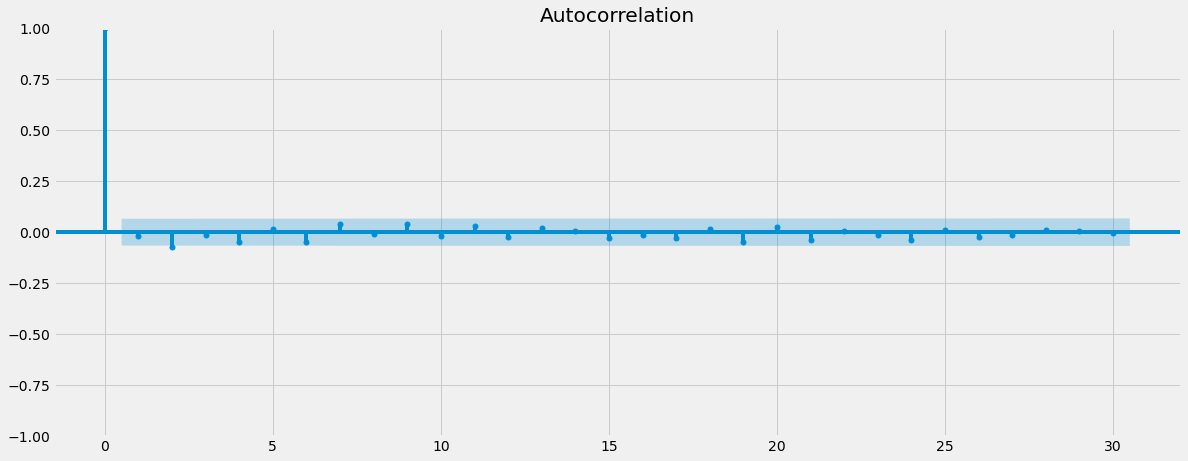

In [110]:
# Plotting autocorrelation
plot_acf(data_diff)
plt.show()

#### This autocorrelation is drastically different from the last. There may be one lag slightly outside the confidence interval. A second round of differencing is not necessary. 